# RCT Server testing
In this notebook we test the main functioning of the RCT server

In [110]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
from dtwinpylib.dtwinpy.services import Service_Handler
import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class
importlib.reload(dtwinpylib.dtwinpy.services)


<module 'dtwinpylib.dtwinpy.services' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\services.py'>

#### Test the Branch Discovery

Test for 5-s model

In [5]:
mydt = Digital_Twin(name="5s_deterministic")
mydt.generate_digital_model()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Par

Test for more complex system

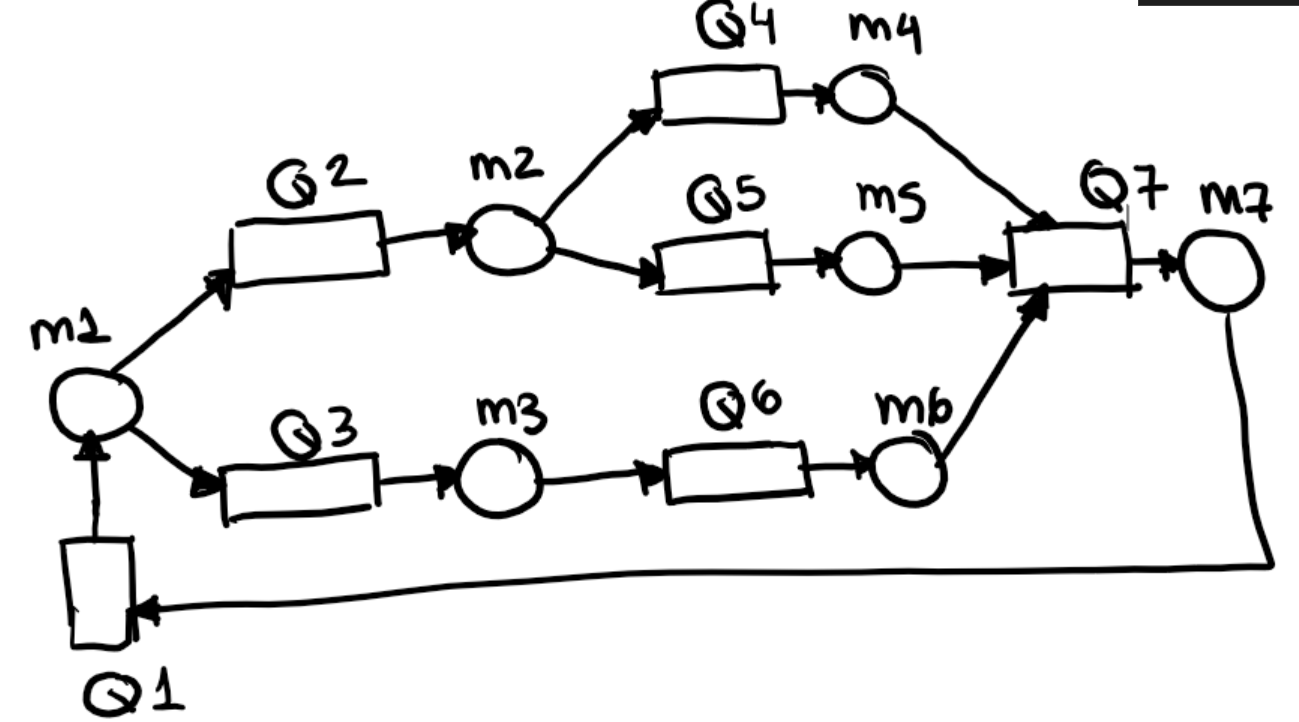

In [9]:
mydt = Digital_Twin(name= "merging_non_parallel")

mydt.generate_digital_model()

==========  Reading the Model: merging_non_parallel  ==========
===> Big Picture
Total number of Machines: 7
Total number of Queues: 7

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [7, 1]
Capacity: 10
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 2
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
|-- Parts stored: Part 4
|-- Parts stored: Part 5
|-- Parts stored: Part 6
Queue Lenght: 3
----------------
Queue 4
Arc links: [2, 4]
Capacity: 10
|-- Parts stored: Part 7
|-- Parts stored: Part 8
|-- Parts stored: Part 9
|-- Parts stored: Part 10
Queue Lenght: 4
----------------
Queue 5
Arc links: [2, 5]
Capacity: 10
|-- Parts stored: Part 11
|-- Parts stored: Part 12
|-- Parts stored: Part 13
|-- Parts stored: Part 14
|-- Parts stored: Part 15
Queue Lenght: 5
----------------
Queue 6
Arc links: [3, 6]
Capacity: 10
|-- Parts stored: Part 16
|-- Parts st

#### Trying out combinations

In [11]:
import itertools

def get_combinations(matrix):
    combinations = []
    for element_combinations in itertools.product(*matrix):
        if len(set(element_combinations)) == len(matrix):
            combinations.append(list(element_combinations))
    return combinations

matrix = [['B1.1', 'B1.2'], ['B2.1', 'B2.2', 'B2.3', 'B2.4'], ['B3.1', 'B3.2', 'B3.3']]
combinations = get_combinations(matrix)
(combinations)

[['B1.1', 'B2.1', 'B3.1'],
 ['B1.1', 'B2.1', 'B3.2'],
 ['B1.1', 'B2.1', 'B3.3'],
 ['B1.1', 'B2.2', 'B3.1'],
 ['B1.1', 'B2.2', 'B3.2'],
 ['B1.1', 'B2.2', 'B3.3'],
 ['B1.1', 'B2.3', 'B3.1'],
 ['B1.1', 'B2.3', 'B3.2'],
 ['B1.1', 'B2.3', 'B3.3'],
 ['B1.1', 'B2.4', 'B3.1'],
 ['B1.1', 'B2.4', 'B3.2'],
 ['B1.1', 'B2.4', 'B3.3'],
 ['B1.2', 'B2.1', 'B3.1'],
 ['B1.2', 'B2.1', 'B3.2'],
 ['B1.2', 'B2.1', 'B3.3'],
 ['B1.2', 'B2.2', 'B3.1'],
 ['B1.2', 'B2.2', 'B3.2'],
 ['B1.2', 'B2.2', 'B3.3'],
 ['B1.2', 'B2.3', 'B3.1'],
 ['B1.2', 'B2.3', 'B3.2'],
 ['B1.2', 'B2.3', 'B3.3'],
 ['B1.2', 'B2.4', 'B3.1'],
 ['B1.2', 'B2.4', 'B3.2'],
 ['B1.2', 'B2.4', 'B3.3']]

In [13]:
def get_combinations(matrix):
    def generate_combinations_helper(matrix, current_index, current_combination, combinations):
        if current_index == len(matrix):
            combinations.append(current_combination)
            return
        for element in matrix[current_index]:
            if element not in current_combination:
                generate_combinations_helper(matrix, current_index + 1, current_combination + [element], combinations)

    combinations = []
    generate_combinations_helper(matrix, 0, [], combinations)
    return combinations

matrix = [['B1.1', 'B1.2'], ['B2.1', 'B2.2', 'B2.3', 'B2.4'], ['B3.1', 'B3.2', 'B3.3']]
combinations = get_combinations(matrix)
(combinations)


[['B1.1', 'B2.1', 'B3.1'],
 ['B1.1', 'B2.1', 'B3.2'],
 ['B1.1', 'B2.1', 'B3.3'],
 ['B1.1', 'B2.2', 'B3.1'],
 ['B1.1', 'B2.2', 'B3.2'],
 ['B1.1', 'B2.2', 'B3.3'],
 ['B1.1', 'B2.3', 'B3.1'],
 ['B1.1', 'B2.3', 'B3.2'],
 ['B1.1', 'B2.3', 'B3.3'],
 ['B1.1', 'B2.4', 'B3.1'],
 ['B1.1', 'B2.4', 'B3.2'],
 ['B1.1', 'B2.4', 'B3.3'],
 ['B1.2', 'B2.1', 'B3.1'],
 ['B1.2', 'B2.1', 'B3.2'],
 ['B1.2', 'B2.1', 'B3.3'],
 ['B1.2', 'B2.2', 'B3.1'],
 ['B1.2', 'B2.2', 'B3.2'],
 ['B1.2', 'B2.2', 'B3.3'],
 ['B1.2', 'B2.3', 'B3.1'],
 ['B1.2', 'B2.3', 'B3.2'],
 ['B1.2', 'B2.3', 'B3.3'],
 ['B1.2', 'B2.4', 'B3.1'],
 ['B1.2', 'B2.4', 'B3.2'],
 ['B1.2', 'B2.4', 'B3.3']]

In [14]:
def verify_combinations(matrix, combinations):
    expected_combinations = 1
    for lst in matrix:
        expected_combinations *= len(lst)
    return len(combinations) == expected_combinations

verify_combinations(matrix=matrix, combinations=combinations)

True

### Testing the path generation 

In [4]:
mydt = Digital_Twin(name="5s_deterministic")
digital_model = mydt.generate_digital_model()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Q

In [6]:
mydt_complex = Digital_Twin(name="merging_non_parallel")
digital_model_complex = mydt_complex.generate_digital_model()

==========  Reading the Model: merging_non_parallel  ==========
===> Big Picture
Total number of Machines: 7
Total number of Queues: 7

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [7, 1]
Capacity: 10
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 2
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
|-- Parts stored: Part 4
|-- Parts stored: Part 5
|-- Parts stored: Part 6
Queue Lenght: 3
----------------
Queue 4
Arc links: [2, 4]
Capacity: 10
|-- Parts stored: Part 7
|-- Parts stored: Part 8
|-- Parts stored: Part 9
|-- Parts stored: Part 10
Queue Lenght: 4
----------------
Queue 5
Arc links: [2, 5]
Capacity: 10
|-- Parts stored: Part 11
|-- Parts stored: Part 12
|-- Parts stored: Part 13
|-- Parts stored: Part 14
|-- Parts stored: Part 15
Queue Lenght: 5
----------------
Queue 6
Arc links: [3, 6]
Capacity: 10
|-- Parts stored: Part 16
|-- Parts st

In [7]:
RCT_Server_complex = Service_Handler(name="RCT", digital_model= digital_model_complex)
RCT_Server = Service_Handler(name="RCT", digital_model= digital_model)

In [8]:
RCT_Server.run_RCT_service(verbose= True)

====== Paths Created ======
---- Path 1 ----
Conveyor towards Queue 2
---- Path 2 ----
Conveyor towards Queue 3
Part 1
|-- Conveyor towards Queue 2
---
|-- Conveyor towards Queue 3
---


In [9]:
parts = digital_model.get_all_parts()
parts[0].get_branching_path()[0].get_name()

'Conveyor towards Queue 3'

In [10]:
mydt.run_digital_model(targeted_part_id=1, generate_model= False)

### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)


AttributeError: 'NoneType' object has no attribute 'get_name'

In [12]:
def func_a():
    print("A")
def func_b(func):
    func()

func_b(func_a)

A


### Testing Running Path Simulations

====== Paths Created ======
---- Path 1 ----
Conveyor towards Queue 2
---- Path 2 ----
Conveyor towards Queue 3
====================================== Simulation AS IS for Part 1 ======================================
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 5000 - [Conveyor towards Queue 2] GOT Part 1
Time: 5000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 5200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 5201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 10000 - [Conveyor towards Queue 3] GOT Part 2
Time: 10000 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 10200 - [Conveyor towards Queue 3] PUT Part 2 in the Queue 3
Time: 10201 - [Conveyor towards Queue 4] GOT Part 1
Time: 10201 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 10301 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 10302 - [Machine 4] got Part 1 from Queue 4 (capacity=

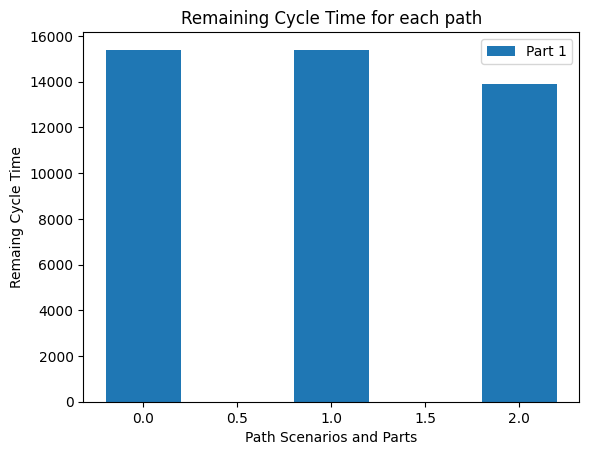

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


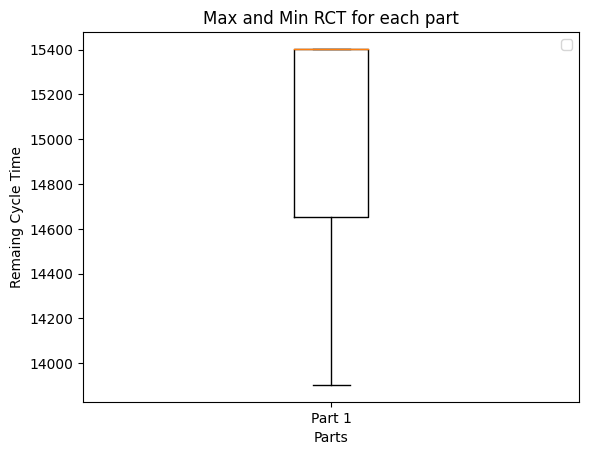

____________________________________________


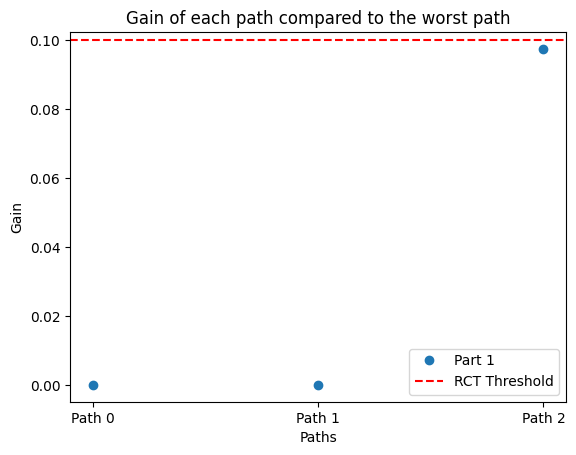

----- No Path found with gain higher than 10.0% -----


In [112]:
mydt = Digital_Twin(name="5s_deterministic")
mydt.run_RCT_services(verbose= True)

Complex System

====== Paths Created ======
---- Path 1 ----
Conveyor towards Queue 2
Conveyor towards Queue 4
---- Path 2 ----
Conveyor towards Queue 2
Conveyor towards Queue 5
---- Path 3 ----
Conveyor towards Queue 3
Conveyor towards Queue 4
---- Path 4 ----
Conveyor towards Queue 3
Conveyor towards Queue 5
====================================== Simulation AS IS for Part 1 ======================================
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 0)
Time: 0 - [Machine 2] got Part 2 from Queue 2 (capacity= 1)
Time: 0 - [Machine 3] got Part 4 from Queue 3 (capacity= 2)
Time: 0 - [Machine 4] got Part 7 from Queue 4 (capacity= 3)
Time: 0 - [Machine 5] got Part 11 from Queue 5 (capacity= 4)
Time: 0 - [Machine 6] got Part 16 from Queue 6 (capacity= 5)
Time: 0 - [Machine 7] got Part 22 from Queue 7 (capacity= 6)
Time: 2099 - [Conveyor towards Queue 7] GOT Part 11
Time: 2099 - [Machine 5] got Part 12 from Queue 5 (capacity= 3)
Time: 

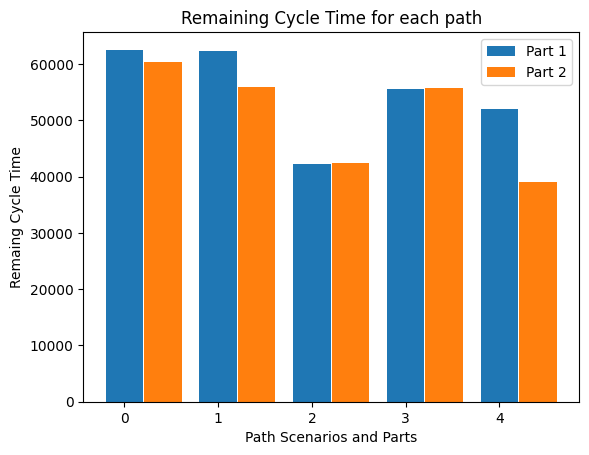

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


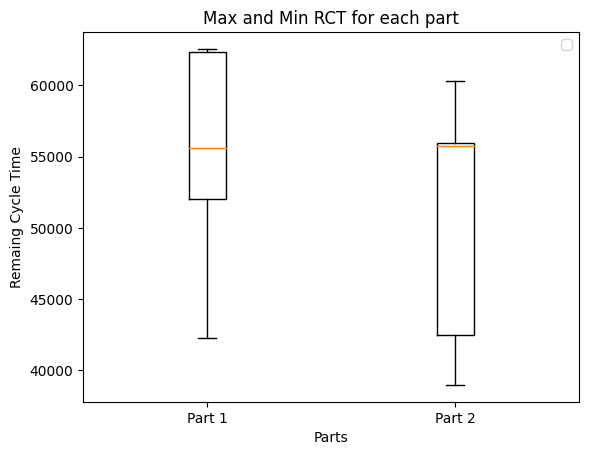

____________________________________________


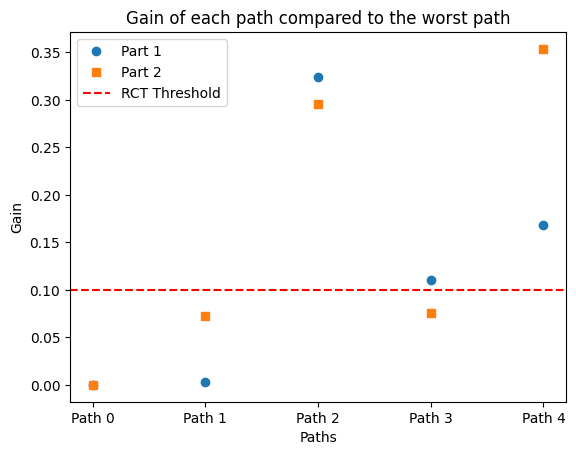


!!!!!!!!! Optimized Path Found for Part 1 !!!!!!!!!
> Best Path: Path 2
> Gain: 32.401 %
> Path:
|- Conveyor towards Queue 2
|- Conveyor towards Queue 5

!!!!!!!!! Optimized Path Found for Part 2 !!!!!!!!!
> Best Path: Path 4
> Gain: 35.372 %
> Path:
|- Conveyor towards Queue 3
|- Conveyor towards Queue 5


In [113]:
mydt_complex = Digital_Twin(name="5s_deterministic_complex")
mydt_complex.run_RCT_services(verbose=True)
